> **DO YOU USE GITHUB?**  
If True: print('Remember to make your edits in a personal copy of this notebook')  
Else: print('You don't have to understand. Continue your life.')

# Module 6: Web Scraping 1

In this module you will be introduced to `web scraping`: 
- What it web scraping?
- How to web scrape?
- Why is web scrpaing important to master as a data scientist?

Readings for `session 6+7+8`:
- [Python for Data Analysis, chapter 6](https://bedford-computing.co.uk/learning/wp-content/uploads/2015/10/Python-for-Data-Analysis.pdf)
- [A Practical Introduction to Web Scraping in Python](https://realpython.com/python-web-scraping-practical-introduction/)
- [An introduction to web scraping with Python](https://towardsdatascience.com/an-introduction-to-web-scraping-with-python-a2601e8619e5)
- [Introduction to Web Scraping using Selenium](https://medium.com/the-andela-way/introduction-to-web-scraping-using-selenium-7ec377a8cf72)

Video materiale from `ISDS 2020`:
- [Web Scraping 1](https://bit.ly/ISDS2021_6)
- [Web Scraping 2](https://bit.ly/ISDS2021_7)
- [Web Scraping 3](https://bit.ly/ISDS2021_8)

Other ressources:
- [Nicklas Webpage](https://nicklasjohansen.netlify.app/)
- [Data Driven Organizational Analysis, Fall 2021](https://efteruddannelse.kurser.ku.dk/course/2021-2022/ASTK18379U)
- [Master of Science (MSc) in Social Data Science](https://www.socialdatascience.dk/education)

## Ethical Considerations
* If a regular user can’t access it, we shouldn’t try to get it [That is considered hacking](https://www.dr.dk/nyheder/penge/gjorde-opmaerksom-paa-cpr-hul-nu-bliver-han-politianmeldt-hacking). 
* Don't hit it to fast: Essentially a DENIAL OF SERVICE attack (DOS). [Again considered hacking](https://www.dr.dk/nyheder/indland/folketingets-hjemmeside-ramt-af-hacker-angreb). 
* Add headers stating your name and email with your requests to ensure transparency. 
* Be careful with copyrighted material.
* Fair use (take only the stuff you need)
* If monetizing on the data, be careful not to be in direct competition with whom you are taking the data from.

<img src="https://github.com/snorreralund/images/raw/master/Sk%C3%A6rmbillede%202017-08-03%2014.46.32.png"/>

## The Web Scraping Recipe

To scrape information from the web is:
1. **MAPPING**: Finding URLs of the pages containing the information you want.
2. **DOWNLOAD**: Fetching the pages via HTTP.
3. **PARSE**: Extracting the information from HTML.  
  
  
You could also add `connection`, `storing`, `logging`, etc.        
   


### Packages used
Today we will mainly build on the python skills you have gotten so far, and tomorrow we will look into more specialized packages.

* for connecting to the internet we use: **requests**
* for parsing: **beautifulsoup** and **regex**
* for automatic browsing / screen scraping: **selenium** 
* for mitigating errors we use: **time**

We will write our scrapers with basic python, for larger projects consider looking into the packages **scrapy**

In [5]:
# check that you can import these lbraries
# otherwise you they can easily be installed using pip
# example: https://pypi.org/project/beautifulsoup4/

import requests
from bs4 import BeautifulSoup
import re
import selenium
import time
import pandas as pd

## Connecting to the Internet


**Connecting to the internet** **HTTP**

*URL* : the adressline in our browser.

Via HTTP we send a **get** request to an *address* with *instructions* ( - or rather our dns service provider redirects our request to the right address)
*Address / Domain*: www.google.com

*Instructions*: /search?q=who+is+mister+miyagi

*Header*: information send along with the request, including user agent (operating system, browser), cookies, and prefered encoding.

*HTML*: HyperTextMarkupLanguage the language of displaying web content. More on this tomorrow.


In [6]:
import requests
response = requests.get('https://www.google.com')
response.text

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="da"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="ECAc55NaAd+ic/22MZwEnA==">(function(){window.google={kEI:\'c9EKYdjsFeSN9u8PuY-vqAk\',kEXPI:\'0,18167,754048,1,530320,56873,954,5105,206,4804,2316,383,246,5,1354,5250,1122516,1197701,582,82,302597,26305,51223,16115,6057,22627,17572,4858,1362,9291,3024,2819,14765,4998,13228,3847,4192,6430,14528,4516,2779,918,5081,889,704,1279,2212,530,149,1103,840,6297,3514,606,2023,1777,520,14670,3227,2845,7,12354,5096,7876,5037,3407,908,2,941,15752,3,350,230,6459,149,13975,4,1528,2304,1236,5227,5259,2015,4067,2506,11802,2658,4243,2458,655,31,13628,2307,636,1494,5586,7266,3269,665,2521,3297,2539,992,3102,20,3118,6,614,294,3,3541,1,11943,2767,1814,283,38,874,5992,12526,2,1398,2802,1715,2,3035,22,12896,1532,2379,1678,743,1275

In [7]:
import requests
response = requests.get('https://isdsucph.github.io/isds2021/')
response.text

'<!DOCTYPE html>\n<html lang="en" itemscope itemtype="http://schema.org/WebPage">\n  <head>\n    \n\n  <meta charset="utf-8" />\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0">\n\n  <title>Intro to Social Data Science - Intro to Social Data Science</title>\n  <meta name="description" content="Welcome This summer course is offered by the Department of Economics together with Copenhagen Center for Social Data Science, both at the University of Copenhagen. This site provides all the necessary course materials that link to the underlying GitHub repository.">\n  <meta name="author" content="Andreas Bjerre-Nielsen"/><script type="application/ld+json">\n{\n    "@context": "http://schema.org",\n    "@type": "WebSite",\n    "name": "Intro to Social Data Science",\n    \n    "url": "https:\\/\\/isdsucph.github.io\\/isds2021\\/"\n}\n</script><script type="application/ld+json">\n{\n  "@context": "h

##  Static Webpage Example

Visit the following website (https://www.basketball-reference.com/leagues/NBA_2018.html).

The page displays tables of data that we want to collect.
Tomorrow you will see how to parse such a table, but for now I want to show you a neat function that has already implemented this.

In [8]:
url = 'https://www.basketball-reference.com/leagues/NBA_2018.html' # link to the website
dfs = pd.read_html(url) # parses all tables found on the page.
dfs[0]

,Eastern Conference,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Toronto Raptors*,59,23,0.720,—,111.7,103.9,7.29
1,Boston Celtics*,55,27,0.671,4.0,104.0,100.4,3.23
2,Philadelphia 76ers*,52,30,0.634,7.0,109.8,105.3,4.30
3,Cleveland Cavaliers*,50,32,0.610,9.0,110.9,109.9,0.59
4,Indiana Pacers*,48,34,0.585,11.0,105.6,104.2,1.18
5,Miami Heat*,44,38,0.537,15.0,103.4,102.9,0.15
6,Milwaukee Bucks*,44,38,0.537,15.0,106.5,106.8,-0.45
7,Washington Wizards*,43,39,0.524,16.0,106.6,106.0,0.53
8,Detroit Pistons,39,43,0.476,20.0,103.8,103.9,-0.26
9,Charlotte Hornets,36,46,0.439,23.0,108.2,108.0,0.07


In [9]:
len(dfs)

13

If we did not have a neat function we would have to navigate the website to point at the data we wanted to collect. Below I show how to find the headline of the table. This is something you will learn about in session 7.

In [10]:
url = 'https://www.basketball-reference.com/leagues/NBA_2018.html'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all('h2')[0].text

'Conference Standings'

In [11]:
soup.find_all("h2")

[<h2>Conference Standings</h2>,
 <h2> </h2>,
 <h2>Division Standings</h2>,
 <h2> </h2>,
 <h2>Playoff Series</h2>,
 <h2>Per Game Stats</h2>,
 <h2>Per Game Stats</h2>,
 <h2>Total Stats</h2>,
 <h2>Total Stats</h2>,
 <h2>Per 100 Poss Stats</h2>,
 <h2>Per 100 Poss Stats</h2>,
 <h2>Advanced Stats</h2>,
 <h2>Shooting Stats</h2>,
 <h2>Shooting Stats</h2>,
 <h2>League Awards</h2>,
 <h2>Players of the Week &amp; Month</h2>,
 <h2>League Leaders</h2>,
 <h2>All-NBA</h2>,
 <h2>All-Defensive</h2>,
 <h2>All-Rookie</h2>,
 <h2>All-Star Game Rosters</h2>,
 <h2>More 2017-18 NBA Pages</h2>,
 <h2>Full Site Menu</h2>,
 <h2>We're Social...for Statheads</h2>,
 <h2>FAQs, Tip &amp; Tricks</h2>]

## Navigating websites to collect links
Now I will show you a few common ways of finding the links to the pages you want to scrape.

### Building URLS using a recognizable pattern.
A nice trick is to understand how urls are constructed to communicate with a server. 

Lets look at how [jobindex.dk](https://www.jobindex.dk/) does it. We simply click around and take note at how the addressline changes.

This will allow us to navigate the page, without having to parse information from the html or click any buttons.

* / is like folders on your computer.
* ? entails the start of a query with parameters 
* = defines a variable: e.g. page=1000 or offset = 100 or showNumber=20
* & separates different parameters.
* \+ is html for whitespace

In [12]:
# Mapping exercise
url = 'https://www.jobindex.dk/jobsoegning/storkoebenhavn?page=2&q=python'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
soup


<!DOCTYPE html>

<html lang="da-DK">
<head>
<title>Ledige job - Python - Storkøbenhavn, side 2 ud af 7 | Jobindex</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta charset="utf-8"/>
<link href="/res/bootstrap-multiselect/dist/css/bootstrap-multiselect.css?h=6a6b68a249811e054fa8d759452816a9248c0748" rel="stylesheet"/><link href="/res/select2/dist/css/select2.min.css?h=a170ecdd58f00519741ed4b63abc064ef35db1a9" rel="stylesheet"/><link href="/res/bootstrap-datepicker/dist/css/bootstrap-datepicker3.standalone.min.css?h=f02cbfe4614ade97b3e5823be92702ae7bd445cd" rel="stylesheet"/><link href="/res/mapbox-gl/dist/mapbox-gl.css?h=0221a0dab467f93c80e8f5264c4f146e6d11496d" rel="stylesheet"/><link href="/res/font-awesome/css/font-awesome.css?h=ee906a8196d0fbd581c27a9d5615db4c250860f2" rel="stylesheet"/><link href="/css/_scss/fonts/roboto.css?h=e5bcd6527330b9ea940dd0de1cc29edbdd15519b" rel="stylesheet"/><link href="/css/_scss/fonts/frank_ruhl_libre.css?h=f908f8924442cd3fc8a7a73091

In [13]:
jobs = int(soup.find('span',attrs={'class':'d-md-none'}).text[0:3])
jobs

128

In [14]:
# 20 jobs per page
for i in range(round(jobs/20)+1):
    print(i)

0
1
2
3
4
5
6


In [15]:
for i in range(round(jobs/20)+1):
    print('https://www.jobindex.dk/jobsoegning/storkoebenhavn?page=' + str(i+1) +'&q=python')

https://www.jobindex.dk/jobsoegning/storkoebenhavn?page=1&q=python
https://www.jobindex.dk/jobsoegning/storkoebenhavn?page=2&q=python
https://www.jobindex.dk/jobsoegning/storkoebenhavn?page=3&q=python
https://www.jobindex.dk/jobsoegning/storkoebenhavn?page=4&q=python
https://www.jobindex.dk/jobsoegning/storkoebenhavn?page=5&q=python
https://www.jobindex.dk/jobsoegning/storkoebenhavn?page=6&q=python
https://www.jobindex.dk/jobsoegning/storkoebenhavn?page=7&q=python


## Good practices
* Transparency: send your email and name in the header so webmasters will know you are not a malicious actor.
* Ratelimiting: Make sure you don't hit their servers to hard.
* Reliability: 
    * Make sure the scraper can handle exceptions (e.g. bad connection) without crashing.
    * Keep a log.
    * Store raw data.


## Logging
Even if logging is not important for the below exercises, get in the habit of using this class for connecting to the internet, to practice logging your activity.

You should run `pip install scraping_class` to install the module to be used.

In [16]:
import scraping_class
logfile = 'exset6_log.csv'## name your log file.
connector = scraping_class.Connector(logfile)

# Exercise Set 6: Web Scraping 1

In this Exercise Set we shall practice our webscraping skills utiilizing only basic python.  
We shall cover variations between static and dynamic pages and build. 

## Exercise Section 6.1: Scraping Jobnet.dk

This exercise you get to practice locating the request that the JavaScript sends to get the job data that it builds the joblistings from. You should use the **>Network Monitor<** tool in your browser. I recomend using Chrome.

Furthermore you practice spotting how the pagination is done, without clicking on the next page button, but instead changing a small parameter in the URL.

> **Ex. 6.1.1:** Go to  www.jobnet.dk and investigate the page. Start your `mapping`. Figure our what url you need to scrape to collect jobposting data. Sometimes this can be hard and requires you to inspect the page.

> **Ex. 6.1.2.:** Use the `request` module to collect the first 20 results and unpack the relevant `json` data into a `pandas` DataFrame.

> **Ex. 6.1.3.:** How many results do you find in total? Store this number as 'n_listings' for later use.

In [17]:
import pandas as pd

#Upon paging the next page with "Network" under Inspect" open, and then finding the proper URL by finding "Search".
#Ask Morten why this is the way. I have no clue.
url = "https://job.jobnet.dk/CV/FindWork/Search?Offset=0&SortValue=BestMatch&SearchString=data"
response = requests.get(url).json()
response

jobs = pd.DataFrame(data=response["JobPositionPostings"])
jobs

,AutomatchType,Abroad,Weight,Title,JobHeadline,Presentation,HiringOrgName,WorkPlaceAddress,WorkPlacePostalCode,WorkPlaceCity,...,HiringOrgCVR,UserLoggedIn,AnonymousEmployer,ShareUrl,DetailsUrl,JobLogUrl,HasLocationValues,ID,Latitude,Longitude
0,0,False,0.9744,Data Manager,Data Manager,Har du erfaring med data governance i en o...,METROSELSKABET I/S,Metrovej 5,2300,København S,...,30823699,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5388014,https://job.jobnet.dk/CV/FindWork/Details/5388014,True,5388014,55.6217,12.5771
1,0,False,0.9742,Senior Cloud Data Engineer,Senior Cloud Data Engineer,Does designing and building cloud infrastruct...,NNE A/S,Bredevej 2,2830,Virum,...,13246009,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5397058,https://job.jobnet.dk/CV/FindWork/Details/5397058,True,5397058,55.7906,12.4878
2,0,False,0.9741,Skan-Data søger en dygtig teamleder til vores ...,Skan-Data søger en dygtig teamleder til vores ...,"Skan- Data søger en dygtig teamleder, der br...",Skan-Data A/S,Danmarksvej 26,8660,Skanderborg,...,36734841,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5390268,https://job.jobnet.dk/CV/FindWork/Details/5390268,True,5390268,56.0498,9.9501
3,0,False,0.9741,Skan-Data søger en dygtig IT-KONSULENT,Skan-Data søger en dygtig IT-KONSULENT,"<p>Skan-<span class=""max"">Data</span> søger en...",Skan-Data A/S,Danmarksvej 26,8660,Skanderborg,...,36734841,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5390264,https://job.jobnet.dk/CV/FindWork/Details/5390264,True,5390264,56.0498,9.9501
4,0,False,0.9741,Dataanalyse & visualisering af data,Dataanalyse & visualisering af data,Er du god til at kommunikere og visualisere <s...,Copenhagen Business School,Solbjerg Plads 3,2000,Frederiksberg,...,19596915,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5397221,https://job.jobnet.dk/CV/FindWork/Details/5397221,True,5397221,55.6815,12.5304
5,0,False,0.9741,To Data- og analysekonsulenter,To Data- og analysekonsulenter,Vi søger to ambitiøse og motiverede data - o...,Gladsaxe Kommune,Rådhus Alle 7,2860,Søborg,...,62761113,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5387173,https://job.jobnet.dk/CV/FindWork/Details/5387173,True,5387173,55.7429,12.4973
6,0,False,0.9740,Data Engineers til databehandling i spændende ...,Data Engineers til databehandling i spændende ...,Hos Udviklings- og Forenklingsstyrelsen i kont...,"Skatteforvaltningen, Frederiksberg",Osvald Helmuths Vej 4,2000,Frederiksberg,...,19552101,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5399769,https://job.jobnet.dk/CV/FindWork/Details/5399769,True,5399769,55.6847,12.5036
7,0,False,0.9740,Data Manager til fremtidens forsyning,Data Manager til fremtidens forsyning,Vil du være en af de bærende kræfter i spændi...,AffaldVarme Aarhus,Karen Blixens Boulevard 7,8220,Brabrand,...,40844244,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5398887,https://job.jobnet.dk/CV/FindWork/Details/5398887,True,5398887,56.1616,10.1342
8,0,False,0.9740,Genopslag - Dataanalytiker til Team Risikoanal...,Genopslag - Dataanalytiker til Team Risikoanal...,Er du typen der kan se værdien af strukturere...,Landbrugsstyrelsen,Nyropsgade 30,1602,København V,...,20814616,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5388459,https://job.jobnet.dk/CV/FindWork/Details/5388459,True,5388459,55.6775,12.5605
9,0,False,0.9740,"Metodisk stærke data- og analysemedarbejdere, ...","Metodisk stærke data- og analysemedarbejdere, ...","... beslutningsgrundlag, der gør en forskel p...",UNI-C - Styrelsen for I

In [18]:
response.keys()
n_listings = response["TotalResultCount"]
n_listings

21502

> **Ex. 6.1.4:** This exercise is about paging the results. We need to understand the websites pagination scheme. 

> Now scroll down the webpage and press the next page button. See how the parameters of the url changes as you turn the pages.

> **Ex. 6.1.5:** Design a`for` loop using the `range` function that changes this paging parameter in the URL. Use 'n_listings' from before to define the limits of the range function. Store these urls in a container. 

In [19]:
url_container = []
for p in range((round(n_listings/20))+1):
    url = f"https://job.jobnet.dk/CV/FindWork?Offset={p*20}&SortValue=BestMatch&SearchString=data"
    url_container.append(url)
url_container[-5:]

['https://job.jobnet.dk/CV/FindWork?Offset=21420&SortValue=BestMatch&SearchString=data',
 'https://job.jobnet.dk/CV/FindWork?Offset=21440&SortValue=BestMatch&SearchString=data',
 'https://job.jobnet.dk/CV/FindWork?Offset=21460&SortValue=BestMatch&SearchString=data',
 'https://job.jobnet.dk/CV/FindWork?Offset=21480&SortValue=BestMatch&SearchString=data',
 'https://job.jobnet.dk/CV/FindWork?Offset=21500&SortValue=BestMatch&SearchString=data']

> **Ex.6.1.6:** Pick 20 random links using the `random.sample()` function and scrape their content. Use the `time.sleep()` function to limit the rate of your calls. Load all the results into a DataFrame. ***extra***: monitor the time left to completing the loop by using `tqdm.tqdm()` function.

In [31]:
import random

import json
from pandas.io.json import json_normalize

rand_sample = random.sample(url_container, 20)

rand_dfs = []

In [32]:
for p in rand_sample:
    p1, p2 = p.split("?")
    p = "/Search?".join([p1, p2])
    response = requests.get(p).json()
    rand_dfs.append(pd.json_normalize(response)) 
    time.sleep(0.6)

Evt. follow https://www.kaggle.com/jboysen/quick-tutorial-flatten-nested-json-in-pandas for additional flattening of nested data.

In [36]:
rand_df = pd.concat(rand_dfs)
rand_df.head(5)

,JobPositionPostings,TotalResultCount,Expression.ShowNearbyCriteria,Expression.Offset,Expression.Count,Expression.SearchString,Expression.SortValue,Expression.Id,Expression.EarliestPublicationDate,Expression.HotJob,...,Facets.Municipality,Facets.PostalCode,Facets.OccupationAreas,Facets.OccupationGroups,Facets.Occupations,Facets.EmploymentType,Facets.WorkHours,Facets.WorkHourPartTime,Facets.JobAnnouncementType,Facets.WorkPlaceNotStatic
0,"[{'AutomatchType': 0, 'Abroad': False, 'Weight...",21507,True,2100,20,data,BestMatch,[],0001-01-01T00:00:00,False,...,"[{'Id': 0, 'Value': 'København', 'Count': 3246...","[{'Id': 0, 'Value': '2400', 'Count': 603}, {'I...","[{'Id': 0, 'Value': 'Sundhed, omsorg og person...","[{'Id': 0, 'Value': 'Pædagogisk arbejde', 'Cou...","[{'Id': 0, 'Value': 'Pædagog', 'Count': 974}, ...","[{'Id': 0, 'Value': 'Fastansættelse', 'Count':...","[{'Id': 0, 'Value': 'Fuldtid', 'Count': 16219}...","[{'Id': 0, 'Value': 'Deltid', 'Count': 2877}]","[{'Id': 0, 'Value': 'Almindelige vilkår', 'Cou...","[{'Id': 0, 'Value': 'false', 'Count': 20957}, ..."
0,"[{'AutomatchType': 0, 'Abroad': False, 'Weight...",21507,True,12440,20,data,BestMatch,[],0001-01-01T00:00:00,False,...,"[{'Id': 0, 'Value': 'København', 'Count': 3246...","[{'Id': 0, 'Value': '2400', 'Count': 603}, {'I...","[{'Id': 0, 'Value': 'Sundhed, omsorg og person...","[{'Id': 0, 'Value': 'Pædagogisk arbejde', 'Cou...","[{'Id': 0, 'Value': 'Pædagog', 'Count': 974}, ...","[{'Id': 0, 'Value': 'Fastansættelse', 'Count':...","[{'Id': 0, 'Value': 'Fuldtid', 'Count': 16219}...","[{'Id': 0, 'Value': 'Deltid', 'Count': 2877}]","[{'Id': 0, 'Value': 'Almindelige vilkår', 'Cou...","[{'Id': 0, 'Value': 'false', 'Count': 20957}, ..."
0,"[{'AutomatchType': 0, 'Abroad': False, 'Weight...",21507,True,9580,20,data,BestMatch,[],0001-01-01T00:00:00,False,...,"[{'Id': 0, 'Value': 'København', 'Count': 3246...","[{'Id': 0, 'Value': '2400', 'Count': 603}, {'I...","[{'Id': 0, 'Value': 'Sundhed, omsorg og person...","[{'Id': 0, 'Value': 'Pædagogisk arbejde', 'Cou...","[{'Id': 0, 'Value': 'Pædagog', 'Count': 974}, ...","[{'Id': 0, 'Value': 'Fastansættelse', 'Count':...","[{'Id': 0, 'Value': 'Fuldtid', 'Count': 16219}...","[{'Id': 0, 'Value': 'Deltid', 'Count': 2877}]","[{'Id': 0, 'Value': 'Almindelige vilkår', 'Cou...","[{'Id': 0, 'Value': 'false', 'Count': 20957}, ..."
0,"[{'AutomatchType': 0, 'Abroad': False, 'Weight...",21507,True,11740,20,data,BestMatch,[],0001-01-01T00:00:00,False,...,"[{'Id': 0, 'Value': 'København', 'Count': 3246...","[{'Id': 0, 'Value': '2400', 'Count': 603}, {'I...","[{'Id': 0, 'Value': 'Sundhed, omsorg og person...","[{'Id': 0, 'Value': 'Pædagogisk arbejde', 'Cou...","[{'Id': 0, 'Value': 'Pædagog', 'Count': 974}, ...","[{'Id': 0, 'Value': 'Fastansættelse', 'Count':...","[{'Id': 0, 'Value': 'Fuldtid', 'Count': 16219}...","[{'Id': 0, 'Value': 'Deltid', 'Count': 2877}]","[{'Id': 0, 'Value': 'Almindelige vilkår', 'Cou...","[{'Id': 0, 'Value': 'false', 'Count': 20957}, ..."
0,"[{'AutomatchType': 0, 'Abroad': False, 'Weight...",21507,True,13820,20,data,BestMatch,[],0001-01-01T00:00:00,False,...,"[{'Id': 0, 'Value': 'København', 'Count': 3246...","[{'Id': 0, 'Value': '2400', 'Count': 603}, {'I...","[{'Id': 0, 'Value': 'Sundhed, omsorg og person...","[{'Id': 0, 'Value': 'Pædagogisk arbejde', 'Cou...","[{'Id': 0, 'Value': 'Pædagog', 'Count': 974}, ...","[{'Id': 0, 'Value': 'Fastansættelse', 'Count':...","[{'Id': 0, 'Value': 'Fuldtid', 'Count': 16219}...","[{'Id': 0, 'Value': 'Deltid', 'Count': 2877}]","[{'Id': 0, 'Value': 'Almindelige vilkår', 'Cou...","[{'Id': 0, 'Value': 'false', 'Count': 20957}, ..."


> **Ex.6.1.7:** Snorre Ralund, a resaercher at SODAS, has build a connector class. Repeat 6.1.6 but try to to use Snorres connector to log your activity.


## Exercise Section 6.2: Scraping Trustpilot.com
Now for a slightly more elaborate, yet still simple scraping problem. Here we want to scrape trustpilot for user reviews. This data is very nice since it provides free labeled data (rating) to train a machine learning model to understand positive and negative sentiment. 

Here you will practice crawling a website collecting the links to each company review page, and finally locate another behind the scenes JavaScript request that gets the review data in a neat json format.

> **Ex. 6.2.1:** Visit the https://www.trustpilot.com/ website and locate the categories page.
From this page you find links to company listings.

> **Ex. 6.2.2:**
Get the category page using the `requests` module and extract each link to a specific category page from the HTML. This can be done using the basic python `.split()` string method. Make sure only links within the ***/categories/*** section are kept, checking each string using the ```if 'pattern' in string``` condition. 

*(Hint: The links are relative. You need to add the domain name)*


In [74]:
import pprint

url = "https://www.trustpilot.com/categories" 
url = "https://cdn.cookielaw.org/consent/84cb5c09-05e4-488b-b71c-2fe171dca5e5/465194c1-18c6-4580-b4b3-58cc278f3048/en-us.json"
response = requests.get(url)
#page = requests.get(url)
#soup = BeautifulSoup(page.content, 'html.parser')
#links = []
'''for a in soup.find_all("a"):
    links.append(a.get("href"))'''
#print(len(links))

cat_j = response.json()
pprint.pprint(cat_j) #does not seem to be what we are after.



{'CommonData': {'AllowHostOptOut': False,
                'BAnimation': 'Slide_In',
                'BCategoryContainerColor': '#F9F9FC',
                'BCategoryStyle': 'Checkbox',
                'BCategoryStyleColor': '#3860BE',
                'BConsentPurposesText': 'Consent Purposes',
                'BConsentText': 'Consent',
                'BContinueColor': '#696969',
                'BFeaturesText': 'Features',
                'BLegitInterestText': 'Legitimate Interest',
                'BLegitimateInterestPurposesText': 'Legitimate Interest '
                                                   'Purposes',
                'BLineBreakColor': '#E9E9E9',
                'BSaveBtnColor': '#1371C3',
                'BSpecialFeaturesText': 'Special Features',
                'BSpecialPurposesText': 'Special Purposes',
                'BackgroundColor': '#FFFFFF',
                'BannerAccordionBackgroundColor': '#E9E9E9',
                'BannerCustomCSS': '/* Banner */\n'
      

                                                    'patternKey': None,
                                                    'thirdPartyDescription': '',
                                                    'thirdPartyKey': None}],
                                       'Description': '',
                                       'DisplayName': 'cdn.amplitude.com',
                                       'HostId': 'H3',
                                       'HostName': 'cdn.amplitude.com',
                                       'PrivacyPolicy': ''},
                                      {'Cookies': [{'DurationType': 1,
                                                    'Host': 'onetrust.com',
                                                    'IsSession': False,
                                                    'Length': '30',
                                                    'Name': '__cfduid',
                                                    'description': 'This '
               

                                                   'thirdPartyKey': None},
                                                  {'DurationType': 1,
                                                   'Host': '.trustpilot.com',
                                                   'IsSession': False,
                                                   'Length': '0',
                                                   'Name': ' '
                                                           'productreviews-{id}-determineReportingIntroductionModal',
                                                   'description': 'Stores the '
                                                                  'state "do '
                                                                  'not show '
                                                                  'again" for '
                                                                  'the '
                                                                  're

                                                   {'DurationType': 1,
                                                    'Host': 'www.facebook.com',
                                                    'IsSession': True,
                                                    'Length': '0',
                                                    'Name': '__facebook',
                                                    'description': 'This '
                                                                   'domain is '
                                                                   'owned by '
                                                                   'Facebook, '
                                                                   'which is '
                                                                   'the '
                                                                   "world's "
                                                                   'largest '
              

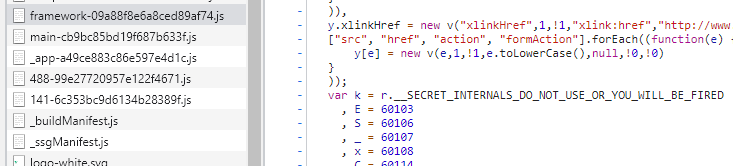

> **Ex. 6.2.3:** Get one of the category section links. Write a function to extract the links to the company review page from the HTML.

> **Ex. 6.2.4:** Figure out how the pagination is done, by following how the url changes when pressing the **next page**-button to obtain more company listings. Write a function that builds links to paging all the company listing results of each category. This includes parsing the number of subpages of each category and changing the correct parameter in the url.

(Hint: Find the maximum number of result pages, right before the next page button and make a loop change the page parameter of the url.)


> **Ex. 6.2.5:** Loop through all categories and build the paging links using the above defined function.

> **Ex. 6.2.6:** Randomly pick one of category listing links you have generated, and get the links to the companies listed using the other function defined. 

> **Ex. 6.2.7:** Visit one of these links and inspect the **>Network Monitor<** to locate the request that loads the review data. Use the requests module to retrieve this link and unpack the json results to a pandas DataFrame.
